# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# mengimport library untuk keperluan analisis klasifikasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [41]:
df = pd.read_csv('AutoInsurance_Clustering.csv')
df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Cluster
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274.0,Suburban,Married,...,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,3
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0.0,Suburban,Single,...,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,964.262851,Four-Door Car,Medsize,1
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767.0,Suburban,Married,...,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,3
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0.0,Suburban,Married,...,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836.0,Rural,Single,...,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


## Features dan Target

In [42]:
X = df.drop(['Cluster'], axis=1)
y = df['Cluster']

In [43]:
X.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274.0,Suburban,Married,...,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0.0,Suburban,Single,...,42.0,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,964.262851,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767.0,Suburban,Married,...,38.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0.0,Suburban,Married,...,65.0,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836.0,Rural,Single,...,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


##### **Penjelasan**

Memisahkan fitur dan target dari dataset dan disimpan dalam variabel x dan y untuk klasifikasi

## Encoding Data Kategorikal

In [44]:
# melakukan encoding terhadap data kategorik
label_encoders = {}

for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [45]:
# mengecek informasi dataset setelah encoding
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8971 entries, 0 to 8970
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          8971 non-null   int32  
 1   Customer Lifetime Value        8971 non-null   float64
 2   Response                       8971 non-null   int32  
 3   Coverage                       8971 non-null   int32  
 4   Education                      8971 non-null   int32  
 5   EmploymentStatus               8971 non-null   int32  
 6   Gender                         8971 non-null   int32  
 7   Income                         8971 non-null   float64
 8   Location Code                  8971 non-null   int32  
 9   Marital Status                 8971 non-null   int32  
 10  Monthly Premium Auto           8971 non-null   float64
 11  Months Since Last Claim        8971 non-null   float64
 12  Months Since Policy Inception  8971 non-null   f

In [46]:
# mengecek dataset terbaru setelah encoding
X.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,1,0,56274.0,1,1,...,5.0,0.0,1.0,0,2,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,4,0,0.0,1,2,...,42.0,0.0,8.0,1,5,2,0,964.262851,0,1
2,2,12887.431650,0,2,0,1,0,48767.0,1,1,...,38.0,0.0,2.0,1,5,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,4,1,0.0,1,1,...,65.0,0.0,7.0,0,1,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,1,1,43836.0,0,2,...,44.0,0.0,1.0,1,3,0,0,138.130879,0,1


##### **Penjelasan**

Sebelum melakukan menggunakan algoritma clustering data kategorikal harus diubah menjadi data numerik supaya dapat diproses dengan benar oleh model.

## Normalisasi dan Standarisasi

In [47]:
# melakukan normalisasi terhadap data numerik
numeric_features = X.select_dtypes(exclude=['object']).columns

scaler_minmax = MinMaxScaler()

X[numeric_features] = scaler_minmax.fit_transform(X[numeric_features])
X.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1.00,0.059734,0.0,0.0,0.0,0.25,0.0,0.562847,0.5,0.5,...,0.050505,0.0,0.000000,0.0,0.250,0.000000,0.000000,0.399011,1.0,0.5
1,0.00,0.350708,0.0,0.5,0.0,1.00,0.0,0.000000,0.5,1.0,...,0.424242,0.0,0.933333,0.5,0.625,0.666667,0.000000,1.000000,0.0,0.5
2,0.50,0.758449,0.0,1.0,0.0,0.25,0.0,0.487763,0.5,0.5,...,0.383838,0.0,0.133333,0.5,0.625,0.000000,0.000000,0.587424,1.0,0.5
3,0.25,0.396695,0.0,0.0,0.0,1.00,1.0,0.000000,0.5,0.5,...,0.656566,0.0,0.800000,0.0,0.125,0.000000,0.666667,0.549473,0.6,0.5
4,1.00,0.063197,0.0,0.0,0.0,0.25,1.0,0.438443,0.0,1.0,...,0.444444,0.0,0.000000,0.5,0.375,0.000000,0.000000,0.143162,0.0,0.5


##### **Penjelasan**

Pada fitur-fitur numerik pada dataset yang ada terdapat perbedaan skala ukuran yang dapat menyebabkan clustering berbasis jarak menjadi bias terhadap fitur dengan skala lebih besar sehingga perlu dilakukan normalisasi guna memberikan bobot yang seimbang pada semua fitur.

## Feature Selection

In [48]:
k_features = 7

selector = SelectKBest(score_func=f_classif, k=k_features)
df_selected = selector.fit_transform(X,y)

# Menampilkan fitur yang terpilih
selected_features = X.columns[selector.get_support()]
print("Fitur Terpilih:", selected_features)

Fitur Terpilih: Index(['Customer Lifetime Value', 'EmploymentStatus', 'Gender',
       'Monthly Premium Auto', 'Renew Offer Type', 'Total Claim Amount',
       'Vehicle Class'],
      dtype='object')


c:\Users\M Ilham Ramadhan\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [ 6 13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\M Ilham Ramadhan\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
c:\Users\M Ilham Ramadhan\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [49]:
X_selected = X[selected_features]
X_selected.head()

,Customer Lifetime Value,EmploymentStatus,Gender,Monthly Premium Auto,Renew Offer Type,Total Claim Amount,Vehicle Class
0,0.059734,0.25,0.0,0.073059,0.000000,0.399011,1.0
1,0.350708,1.00,0.0,0.301370,0.666667,1.000000,0.0
2,0.758449,0.25,0.0,0.429224,0.000000,0.587424,1.0
3,0.396695,1.00,1.0,0.410959,0.000000,0.549473,0.6
4,0.063197,0.25,1.0,0.109589,0.000000,0.143162,0.0


##### **Penjelasan**

Memisahkan fitur dan target dari dataset dan disimpan dalam variabel x dan y untuk klasifikasi

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [50]:
# memisahkan data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [51]:
# mengecek ukuran data training dan data testing
print('x_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (7176, 7)
y_train shape:  (7176,)
x_test shape:  (1795, 7)
y_test shape:  (1795,)


##### **Penjelasan**

Tahapan data spliting berguna untuk memisahkan dataset menjadi data latih dan data uji yang nantinya akan digunakan untuk mengevaluasi permodelan. Untuk da splitting dilakukan pembagian data testing sebesar 20% dari dataset awal dan 80% dataset awal digunakan sebagai data training.

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Random Forest dan  Support Vector Machine.
2. Latih model menggunakan data latih.

### Random Forest

In [52]:
# inisialisasi model klasifikasi
rf = RandomForestClassifier()

In [53]:
# melatih model dengan data training
rf.fit(X_train, y_train)

RandomForestClassifier()

### Support Vector Machine

In [54]:
# inisialisasi model klasifikasi
svm = SVC()

In [55]:
# melatih model dengan data training
svm.fit(X_train, y_train)

SVC()

#### Penjelasan

- **Random Forest**

Model ini dipilih karena kemampuan dalam menghadapi hubungan kompleks antara fitur dan targer tanpa perlu asumsin linearitas. Random Forest bekerja dengan membangun banyak pohon keputusan dan melakukan voting, sehingga mampu mengidentifikasi pola tersembunyi dalam data. Selain itu, Random Forest juga tidak terlalu sensitif terhadap outlier dan dapat menangani kombinasi fitur numerik dan kategorikal dengan baik.

- **Support Vector Machine (SVM)**

Model ini dipilih akrena kemampuannya menangani data yang tidak terpisah secara linear dengan memetakan fitur ke dalam dimensi yang lebih tinggi menggunakan fungsi kernel. Dengan dataset yang tidak terlalu besar dan hubungan non-linear antara fitur dan target, SVM dengan kernel Radial Basis Function (RBF) menjadi pilihan yang tepat.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

### Random Forest

In [56]:
y_pred_rf = rf.predict(X_test)

### Support Vector Machine 

In [57]:
y_pred_svm = svm.predict(X_test)

### Evaluation Metric

In [58]:
y_preds = {
    "Random Forest": y_pred_rf,
    "Support Vector Machine": y_pred_svm,
}

In [59]:
# Menyimpan hasil evaluasi dalam dictionary dengan nilai dalam persen
metric = []
for model_name, y_pred in y_preds.items():
    metric.append({
        "Model": model_name,
        "Accuracy": f"{accuracy_score(y_test, y_pred) * 100:.2f}%",
        "Precision": f"{precision_score(y_test, y_pred, average='weighted') * 100:.2f}%",
        "Recall": f"{recall_score(y_test, y_pred, average='weighted') * 100:.2f}%",
        "F1-Score": f"{f1_score(y_test, y_pred, average='weighted') * 100:.2f}%"
    })

In [60]:
df_metric = pd.DataFrame(metric)
print(df_metric)

                    Model Accuracy Precision  Recall F1-Score
0           Random Forest   99.11%    99.12%  99.11%   99.11%
1  Support Vector Machine   99.11%    99.13%  99.11%   99.11%


### Confusion Matrix

#### Random Forest

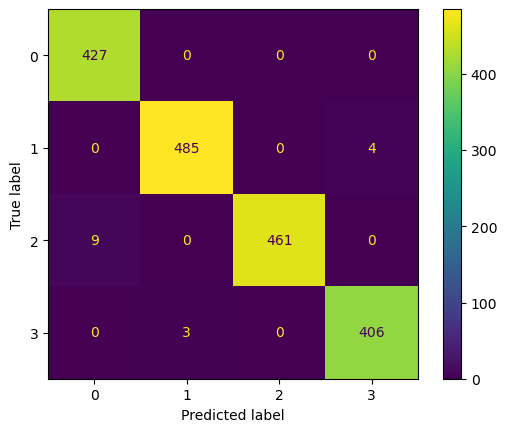

In [61]:
rf_cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf.classes_)
disp.plot()
plt.show()

#### Support Vector Machine 

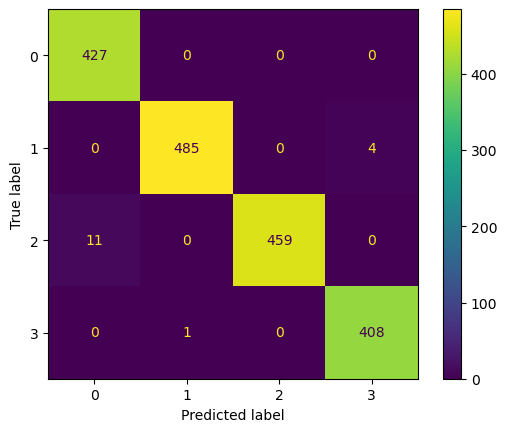

In [62]:
svm_cm = confusion_matrix(y_test, y_pred_svm, labels=svm.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=svm.classes_)
disp.plot()
plt.show()

#### Penjelasan

Berdasarkan hasil evaluasi model, Forest menunjukkan performa yang lebih baik dibandingkan Support Vector Machine (SVM) dalam semua metrik evaluasi. 

- **Random Forest**

Model Random Forest menunjukkan performa yang sangat baik dengan akurasi sebesar 99.11%, yang berarti model mampu mengklasifikasikan hampir seluruh data dengan benar. Precision dan recall masing-masing sebesar 99.12% dan 99.11%, menunjukkan bahwa model ini jarang melakukan kesalahan baik dalam mendeteksi kelas positif maupun negatif. Nilai F1-Score sebesar 99.11% mempertegas bahwa model memiliki keseimbangan yang baik antara precision dan recall, sehingga dapat dianggap andal untuk tugas klasifikasi ini.

- **Support Vector Machine (SVM)**

Model Support Vector Machine (SVM) juga menunjukkan performa yang sangat tinggi dengan akurasi sebesar 99.11%, sama seperti Random Forest. Precision dan recall yang mencapai 99.13% dan 99.11% menunjukkan bahwa SVM juga mampu melakukan klasifikasi secara akurat. Nilai F1-Score sebesar 99.11% menunjukkan keseimbangan antara precision dan recall yang sangat baik.

Model Random Forest dan SVM menunjukkan performa yang sangat dekat dalam semua metrik evaluasi. Untuk menentukan model mana yang lebih baik, perlu dilakukan hyperparameter tuning untuk mencari parameter optimal pada tiap model dengan harapan performa kedua model meningkat.


## **c. Tuning Model Klasifikasi (Optional)**

Untuk mencari kombinasi hyperparameter terbaik menggunakan GridSearch

### GridSearch

#### Logistic Regression

In [63]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Parameters Random Forest:", grid_rf.best_params_)

Best Parameters Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


#### Support Vector Machine 

In [64]:
param_grid_svm = {
    'C' : np.logspace(-3, 3, 10),
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best Parameters SVM:", grid_svm.best_params_)

Best Parameters SVM: {'C': 0.46415888336127775, 'degree': 2, 'gamma': 'scale'}


#### Penjelasan

Hyperparameter tuning dilakukan untuk mengoptimalkan performa model dengan mencari kombinasi parameter terbaik yang memberikan hasil paling akurat. Hyperparametr tuning ini berguna untuk memaksimalkan akurasi, menghindari overfitting, meningkatkan generalisasi, dan menyesuaikan model dengan data tanpa harus melakukan pemilihan parameter secara manual. Dengan menggunakan hyperparameter GridSearch didapatkan parameter terbaik untuk model Random Forest adalah {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}  untuk dataset ini dan parameter terbaik SVM untuk dataset ini adalah sebagai berikut Best Parameters {'C': 0.46415888336127775, 'degree': 2, 'gamma': 'scale'}

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

### Random Forest

In [65]:
best_rf = grid_rf.best_estimator_
tun_y_pred_rf = best_rf.predict(X_test)

### Support Vector Machine 

In [66]:
best_svm = grid_svm.best_estimator_
tun_y_pred_svm = best_svm.predict(X_test)


### Evaluasi

In [67]:
tun_y_preds = {
    "Random Forest": tun_y_pred_rf,
    "Support Vector Machine": tun_y_pred_svm
}

In [68]:
# Menyimpan hasil evaluasi dalam dictionary dengan nilai dalam persen
tun_metric = []
for model_name, y_pred in tun_y_preds.items():
    tun_metric.append({
        "Model": model_name,
        "Accuracy": f"{accuracy_score(y_test, y_pred) * 100:.2f}%",
        "Precision": f"{precision_score(y_test, y_pred, average='weighted') * 100:.2f}%",
        "Recall": f"{recall_score(y_test, y_pred, average='weighted') * 100:.2f}%",
        "F1-Score": f"{f1_score(y_test, y_pred, average='weighted') * 100:.2f}%"
    })

In [69]:
df_tun_metric = pd.DataFrame(tun_metric)
print(df_tun_metric)

                    Model Accuracy Precision  Recall F1-Score
0           Random Forest   99.16%    99.17%  99.16%   99.16%
1  Support Vector Machine   99.22%    99.23%  99.22%   99.22%


#### Penjelasan

Berdasarkan hasil evaluasi setelah tuning, Random Forest dan Support Vector Machine (SVM) mengalami peningkatan performa pada semua metrik evaluasi setelah dilakukan tuning. Hal ini menunjukkan bahwa tuning berhasil meningkatkan performa model pada dataset ini.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### **Analisis Hasil Evaluasi Model Klasifikasi**

In [70]:
df_summary = df_metric.merge(df_tun_metric, on="Model", suffixes=("", " (Tuned)"))

print(df_summary)


                    Model Accuracy Precision  Recall F1-Score  \
0           Random Forest   99.11%    99.12%  99.11%   99.11%   
1  Support Vector Machine   99.11%    99.13%  99.11%   99.11%   

  Accuracy (Tuned) Precision (Tuned) Recall (Tuned) F1-Score (Tuned)  
0           99.16%            99.17%         99.16%           99.16%  
1           99.22%            99.23%         99.22%           99.22%  


#### Penjelasan

Dari hasil evaluasi sebelum dan sesudah hyperparameter tuning, Random Forest dan Support Vector Machine (SVM) menunjukkan performa awal yang sangat mirip. Sebelum dilakukan tuning, Random Forest memiliki akurasi, recall, dan F1-score sebesar 99.11% serta precision sebesar 99.12%, sedangkan SVM memiliki metrik yang serupa dengan akurasi dan recall sebesar 99.11%, precision sebesar 99.13%, dan F1-score 99.11%. Meskipun selisihnya sangat kecil, SVM sedikit lebih unggul dalam precision. Namun, setelah dilakukan tuning, SVM mengalami peningkatan performa yang lebih signifikan, dengan seluruh metrik evaluasi meningkat menjadi 99.22%, melampaui Random Forest yang juga mengalami peningkatan, tetapi hanya mencapai 99.16%. Ini menunjukkan bahwa SVM lebih responsif terhadap tuning, dan memiliki potensi yang tinggi ketika hyperparameter-nya dioptimalkan dengan baik.

In [71]:
models = {
    "Random Forest": best_rf,
    "Support Vector Machine": best_svm,
}


In [72]:
overfit_summary = []

for name, model in models.items():
    train_acc = accuracy_score(y_train, model.predict(X_train)) * 100
    test_acc = accuracy_score(y_test, model.predict(X_test)) * 100
    gap = test_acc - train_acc

    overfit_summary.append({
        "Model": name,
        "Train Accuracy": f"{train_acc:.2f}%",
        "Test Accuracy": f"{test_acc:.2f}%",
        "Gap (%)": f"{gap:.2f}%"
    })

In [73]:
df_overfit = pd.DataFrame(overfit_summary)
print(df_overfit)

                    Model Train Accuracy Test Accuracy Gap (%)
0           Random Forest         99.86%        99.16%  -0.70%
1  Support Vector Machine         99.50%        99.22%  -0.28%


#### Penjelasan

- **Random Forest**

Model Random Forest menunjukkan performa yang sangat baik dengan Train Accuracy sebesar 99.86% dan Test Accuracy sebesar 99.16%. Selisih akurasi sebesar -0.70% mengindikasikan adanya penurunan performa saat model diuji dengan data yang belum pernah dilihat. Meskipun nilai gap ini masih tergolong kecil, hal ini sedikit mengarah pada indikasi overfitting ringan, di mana model terlalu menyesuaikan diri terhadap data training. Namun secara keseluruhan, Random Forest tetap menunjukkan kemampuan klasifikasi yang sangat tinggi dan masih dapat dianggap cukup stabil.

- **Support Vector Machine (SVM)**

Model Support Vector Machine (SVM) mencatat Train Accuracy sebesar 99.50% dan Test Accuracy sebesar 99.22%, dengan gap hanya sebesar -0.28%. Gap ini lebih kecil dibandingkan Random Forest, yang menandakan bahwa SVM memiliki generalisasi yang lebih baik dan tidak terlalu bergantung pada data training. Meskipun Train Accuracy-nya sedikit lebih rendah dari Random Forest, konsistensinya di data testing justru membuat SVM menjadi model yang lebih stabil dan lebih dapat diandalkan dalam skenario produksi.

#### Evaluasi Algoritma

- **Evaluasi Hyperparameter Tuning**

Sebelum dilakukan tuning, baik model Random Forest maupun Support Vector Machine (SVM) menunjukkan performa yang identik, yaitu 99.11% untuk akurasi, recall, dan F1-score serta precision score yang tidak terpaut jauh. Setelah dilakukan hyperparameter tuning, model SVM mengalami peningkatan performa akurasi menjadi 99.22%, mengungguli Random Forest yang hanya mengalami peningkatan tipis ke 99.16%. Hal ini menunjukkan bahwa tuning berdampak lebih besar terhadap SVM, yang lebih responsif terhadap perubahan parameter, sementara Random Forest tampaknya sudah cukup optimal sejak awal atau tidak mendapatkan kombinasi parameter terbaik dalam grid search.

- **Identifikasi Kelemahan Model**

Jika dilihat dari selisih akurasi antara data training dan testing (accuracy gap), Random Forest memiliki gap sebesar -0.70%, sedangkan SVM hanya -0.28%. Meskipun keduanya masih dalam batas wajar, gap yang lebih besar pada Random Forest mengindikasikan potensi overfitting ringan, di mana model terlalu menyesuaikan diri terhadap data pelatihan. Sementara itu, SVM menunjukkan kemampuan generalisasi yang lebih baik dengan perbedaan kinerja yang sangat kecil antara training dan testing. Di sisi lain, dari segi precision, recall, dan F1-score, keduanya menunjukkan nilai tinggi dan seimbang, menandakan tidak adanya masalah ketidakseimbangan klasifikasi antar kelas.

- **Rekomendasi**

Berdasarkan hasil evaluasi, Support Vector Machine (SVM) layak dijadikan sebagai model akhir karena menunjukkan performa tertinggi setelah dilakukan hyperparameter tuning serta memiliki kemampuan generalisasi yang lebih baik dibandingkan Random Forest. Meskipun begitu, Random Forest tetap merupakan model yang kompetitif dan dapat menjadi alternatif yang baik, terutama jika interpretabilitas model menjadi pertimbangan utama. Untuk meningkatkan performa lebih lanjut, disarankan untuk melakukan feature engineering guna menambahkan fitur yang lebih relevan atau menghapus fitur yang kurang informatif dengan metode lain atau jumlah K lain. Selain itu, tuning lanjutan menggunakan pendekatan seperti RandomizedSearchCV atau Bayesian Optimization dapat dieksplorasi untuk memperoleh kombinasi parameter yang lebih optimal. Eksperimen dengan model lain seperti Gradient Boosting, XGBoost, atau Neural Networks juga dapat menjadi langkah strategis untuk membandingkan dan menentukan model yang paling sesuai dengan karakteristik data yang digunakan. Selain itu, menerapkan cross-validation dengan stratifikasi juga disarankan untuk menjaga proporsi kelas pada tiap fold dan mendapatkan estimasi performa yang lebih stabil.
